In [5]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, precision_recall_curve, auc
from sklearn.preprocessing import LabelEncoder
import statistics
from urllib.parse import urlparse
import matplotlib.pyplot as plt

In [6]:
# read data into a pandas DataFrame
data_df = pd.read_csv('final.csv')
data_df.head()

,actual query,query,google,noogle
0,nepal nagrita number check online citizenship,nepal nagrita number check online,"https://nagarikapp.gov.np, https://nepal.gov.n...","http://drrportal.gov.np/news/newsdetail/19, ht..."
1,ocr nepal company,ocr nepal company,"https://application.ocr.gov.np, https://www.oc...",https://nepal.gov.np:8443/NationalPortal/view-...
2,company search nepal,company search nepal,"http://nepal.gov.np, https://www.ocr.gov.np, h...",https://nepal.gov.np:8443/NationalPortal/view-...
3,nepal government party,nepal government party,"https://mofa.gov.np, http://nepal.gov.np, http...",https://nepal.gov.np:8443/NationalPortal/view-...
4,nepal government job,nepal government job,"https://mofa.gov.np, http://nepal.gov.np, http...","http://nepal.gov.np/, https://www.nepal.gov.np..."


In [19]:
def strip(url):
    parsed_url = urlparse(url)
    return parsed_url.hostname

def calculate_metrics(row):
    # extract the actual and predicted values for the row
    actual = row['google'].split(', ')
    predicted = row['noogle'].split(', ')
    
    
    stripped_actual = [strip(url) for url in actual]
    stripped_predicted = [strip(url) for url in predicted]

    act = actual
    prdt = predicted
    
    labels = set(act + prdt)
    y_true = [1 if label in act else 0 for label in labels]
    y_pred = [1 if label in prdt else 0 for label in labels]

    precision, recall, thresholds = precision_recall_curve(y_true, y_pred)

    auc_pr = auc(recall, precision)
    
    metrics = {}

    metrics['recall'] = statistics.mean(recall)
    metrics['precision'] = statistics.mean(precision)

    metrics['arr-precision'] = precision
    metrics['arr-recall'] = recall

    metrics['auc_pr'] = auc_pr
    
    
    metrics['query'] = row['query']

    return pd.Series(metrics)

results = data_df.apply(calculate_metrics, axis=1)
results = pd.melt(results, id_vars=['query'], var_name='metric', value_name='value')

In [20]:
recall = data_df.apply(lambda row: calculate_metrics(row)['recall'], axis=1)
precision = data_df.apply(lambda row: calculate_metrics(row)['precision'], axis=1)

arr_precision = data_df.apply(lambda row: calculate_metrics(row)['arr-precision'], axis=1)
arr_recall = data_df.apply(lambda row: calculate_metrics(row)['arr-recall'], axis=1)

auc_pr = data_df.apply(lambda row: calculate_metrics(row)['auc_pr'], axis=1)

results = pd.concat([data_df['query'], precision, arr_precision, recall, arr_recall, auc_pr], axis=1)

# column_names = {'query': 'query', 0: 'accuracy', 1: 'precision', 2: 'recall', 3: 'f1-score'}
column_names = {'query': 'query', 0: 'precision', 1: "arr-precision", 2: "recall", 3: "arr-recall", 4: "auc-pr"}
results = results.rename(columns=column_names)
results = results.reset_index().rename(columns={'index': 'new_index'})

In [21]:
results.head(50)

,new_index,query,precision,arr-precision,recall,arr-recall,auc-pr
0,0,nepal nagrita number check online,0.363036,"[0.0891089108910891, 0.0, 1.0]",0.333333,"[1.0, 0.0, 0.0]",0.044554
1,1,ocr nepal company,0.386555,"[0.15966386554621848, 0.0, 1.0]",0.333333,"[1.0, 0.0, 0.0]",0.079832
2,2,company search nepal,0.408095,"[0.21428571428571427, 0.01, 1.0]",0.345679,"[1.0, 0.037037037037037035, 0.0]",0.126693
3,3,nepal government party,0.360856,"[0.08256880733944955, 0.0, 1.0]",0.333333,"[1.0, 0.0, 0.0]",0.041284
4,4,nepal government job,0.360856,"[0.08256880733944955, 0.0, 1.0]",0.333333,"[1.0, 0.0, 0.0]",0.041284
5,5,nepal government news,0.400000,"[0.2, 0.0, 1.0]",0.333333,"[1.0, 0.0, 0.0]",0.100000
6,6,opmcm bagmati,0.395000,"[0.175, 0.01, 1.0]",0.349206,"[1.0, 0.047619047619047616, 0.0]",0.112143
7,7,मन्त्रिपरिषद्का निर्णयहरु,0.370031,"[0.11009174311926606, 0.0, 1.0]",0.333333,"[1.0, 0.0, 0.0]",0.055046
8,8,नेपालको प्रधानमन्त्री 2080,0.403509,"[0.21052631578947367, 0.0, 1.0]",0.333333,"[1.0, 0.0, 0.0]",0.105263
9,9,home ministry of nepal,0.466296,"[0.3888888888888889, 0.01, 1.0]",0.338624,"[1.0, 0.015873015873015872, 0.0]",0.204295


In [22]:
graph_results = results.set_index('new_index')

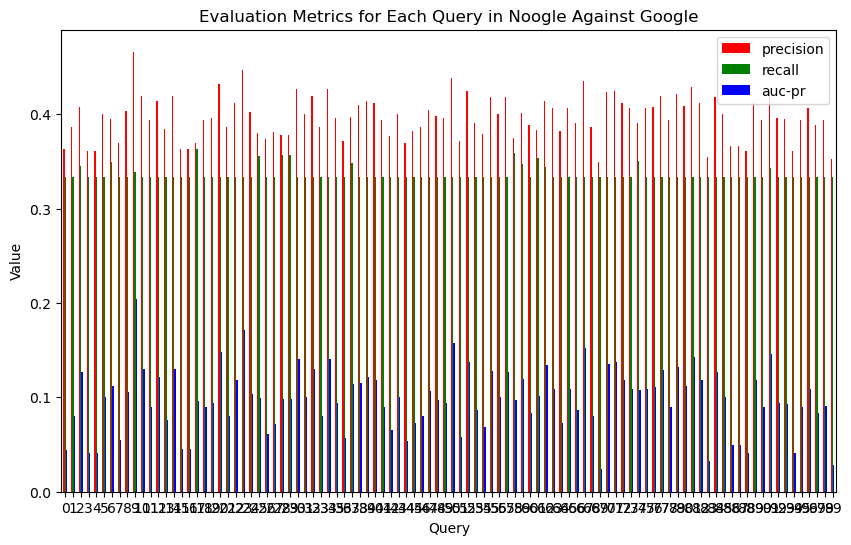

In [23]:
# graph visualization

graph_colors = ['r', 'g', 'b']

ax = graph_results.plot(kind='bar', figsize=(10,6), rot=0,  color=graph_colors)
ax.set_title('Evaluation Metrics for Each Query in Noogle Against Google')
ax.set_xlabel('Query')
ax.set_ylabel('Value')

plt.show()

In [24]:
mean_prc = results["precision"].mean()
mean_rcl = results["recall"].mean()
mean_f1 = results["auc-pr"].mean()

print("Precision: " + str(mean_prc))
print("Recall: " + str(mean_rcl))
print("AUC-PR " + str(mean_f1))

Precision: 0.396692728479476
Recall: 0.3358068087695282
AUC-PR 0.09817074285714719
